In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**setosa - 0,
  versicolor - 1, 
  virginica - 2**

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
df.sample(17)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
20,5.4,3.4,1.7,0.2
70,5.9,3.2,4.8,1.8
4,5.0,3.6,1.4,0.2
16,5.4,3.9,1.3,0.4
2,4.7,3.2,1.3,0.2
21,5.1,3.7,1.5,0.4
118,7.7,2.6,6.9,2.3
47,4.6,3.2,1.4,0.2
104,6.5,3.0,5.8,2.2
43,5.0,3.5,1.6,0.6


In [8]:
df.shape

(150, 4)

In [12]:
df['target'] = iris.target
df.sample(9)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
86,6.7,3.1,4.7,1.5,1
118,7.7,2.6,6.9,2.3,2
79,5.7,2.6,3.5,1.0,1
60,5.0,2.0,3.5,1.0,1
126,6.2,2.8,4.8,1.8,2
36,5.5,3.5,1.3,0.2,0
24,4.8,3.4,1.9,0.2,0
99,5.7,2.8,4.1,1.3,1
108,6.7,2.5,5.8,1.8,2


In [13]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [14]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [15]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df0 = df[:50]#setosa 
df1 = df[50:100]#versicolor
df2 = df[100:]#verginica 

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

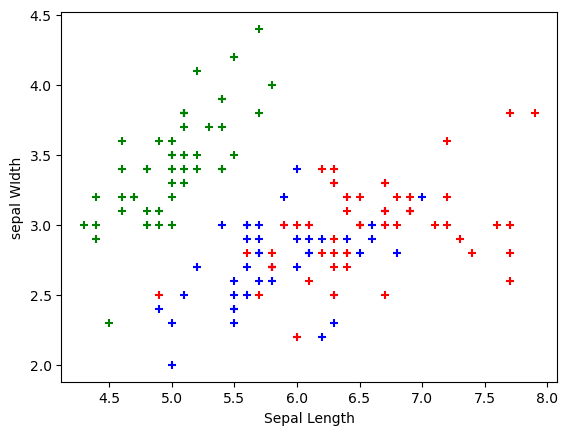

In [24]:
plt.xlabel('Sepal Length')
plt.ylabel('sepal WIdth')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green',marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'blue',marker = '+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'red',marker = '+')


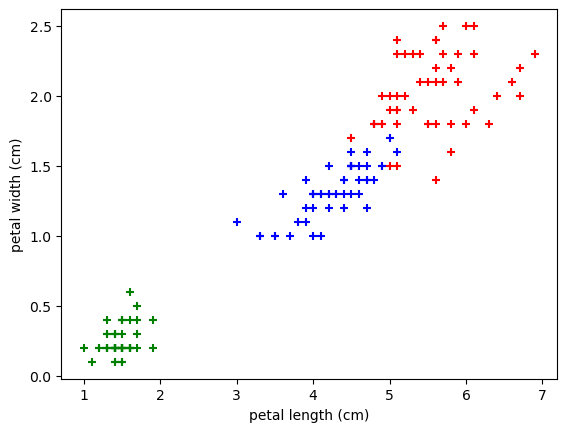

In [26]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green',marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue',marker = '+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'red',marker = '+')

## Train Test split

In [27]:
from sklearn.model_selection import train_test_split

In [32]:
x = df.drop(['target'], axis = 'columns')

In [29]:
y = df.target

In [33]:
x_train,x_test, y_train,y_test = train_test_split(x,y ,test_size = 0.2,random_state = 1)

In [34]:
len(x_train)

120

In [35]:
len(x_test)

30

## Creating KNN (K Neighrest Neighbour Classifier)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

**WHENEVER YOU ARE USING KNN YOU MUST HAVE THE BEST VALUE OF THE (K), WE CAN SAY THAT (NEAREST NEIGHBOURS)**
### 3 is ideal value for k but you can adust it according to your prediction 

In [45]:
knn.score(x_test ,y_test)

1.0

In [48]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

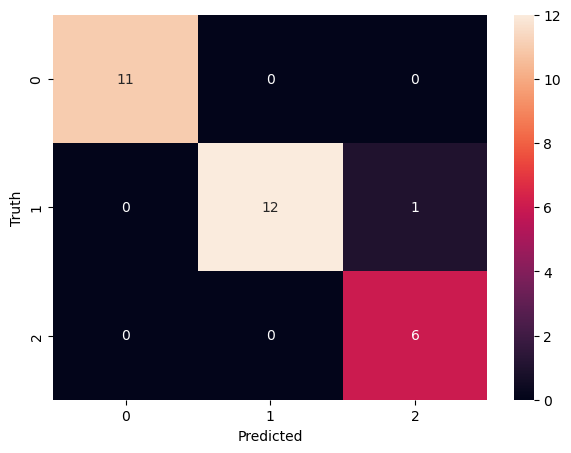

In [49]:
%matplotlib inline 
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
# total prediction is 30 
# and only 1 time , it becomes wrong .
# when target variable is 1 (versicolor)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

